## Step 1: Load Libraries and Data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#sns.set_theme(style="whitegrid")
# sns.set_theme(style="ticks", palette="muted")
sns.set_context('notebook')

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.shape

(244, 7)

## Step 2: Create Plot 

Notice that we don't need to explicitly specify which Axes and Figure to use when plotting—it works without it! However, this will become essential when we start using Seaborn in more complex scenarios and with more customizations.

<Axes: xlabel='total_bill', ylabel='tip'>

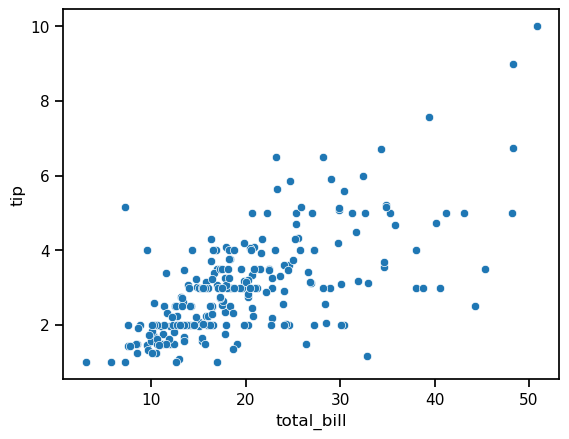

In [7]:
# scatterplot

sns.scatterplot(tips, x='total_bill', y='tip')


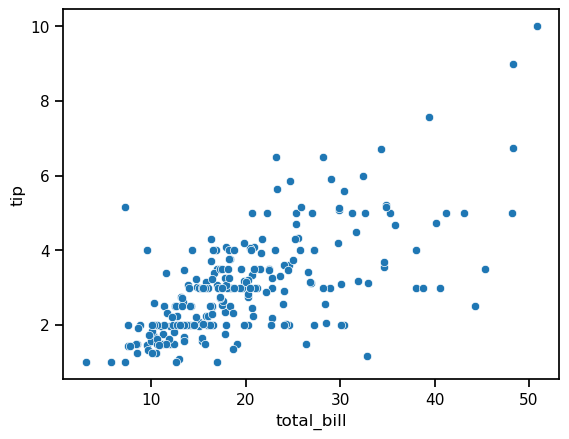

In [8]:
# same scatterplot, but with defined figure and axes - ready for further customization using matplotlib code

fig, ax = plt.subplots()
sns.scatterplot(data = tips, x='total_bill', y='tip')

plt.show()

## Hue
One common feature across most Seaborn functions is the **hue argument**. This argument takes a column from your dataset and, when provided, it colors and separates the chart based on the specified variable.

<Axes: xlabel='total_bill', ylabel='tip'>

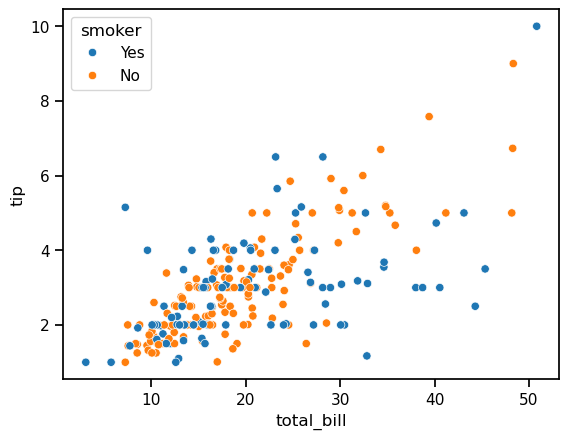

In [9]:
sns.scatterplot(data = tips, x='total_bill', y='tip', hue = 'smoker')

## Distribution Plots


The following plots allow us to visualize the distribution of a data set:

* `histplot`- a histogram
* `kdeplot` - a smoothed version of the histogram, blending the bars into a continuous curve
* `jointplot`- showing the relationship between two variables and their distribution
* `pairplot` - shows the relationship between all numerial variables in the dataset


<Axes: xlabel='total_bill', ylabel='Count'>

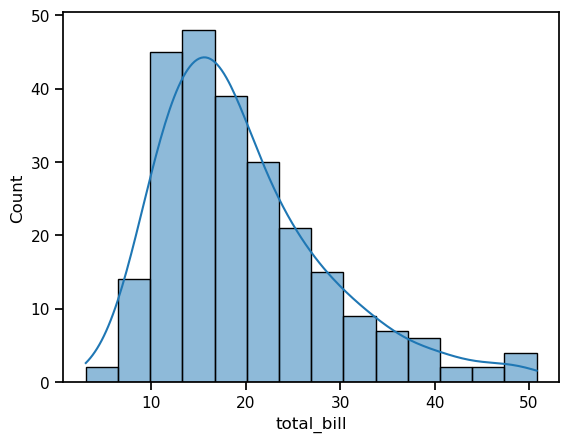

In [10]:
# histplot with kde curve

sns.histplot(data=tips, x='total_bill', kde=True)


<Axes: xlabel='total_bill', ylabel='Count'>

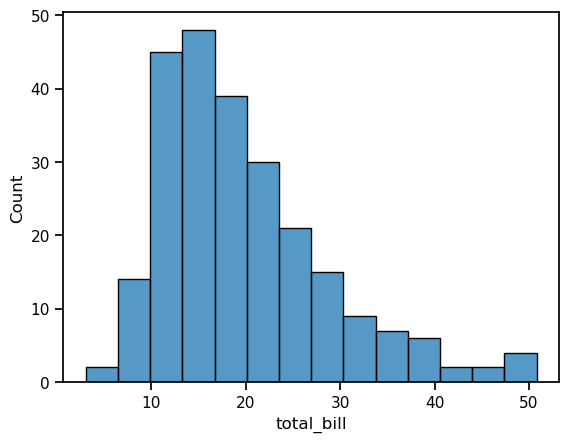

In [11]:
# histplot without kde curve (default)

sns.histplot(data = tips, x='total_bill')


<Axes: xlabel='total_bill', ylabel='Count'>

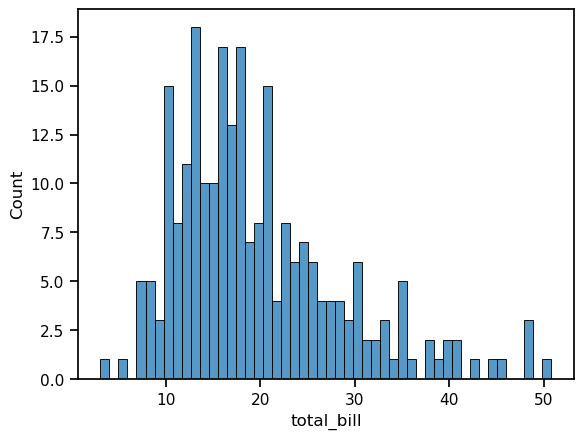

In [12]:
# you can adjust the number of bins using the bin argument

#sns.histplot(tips['total_bill'], bins = 50)
sns.histplot(data=tips, x='total_bill', bins = 50)


<Axes: xlabel='total_bill', ylabel='Density'>

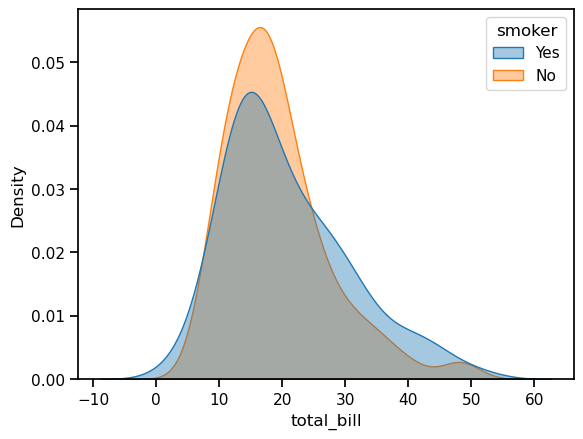

In [13]:
# kde plot

# sns.kdeplot(data=tips, x="total_bill", hue="smoker", fill =True, alpha = 0.4)       # Visualizing actual sample imbalance
sns.kdeplot(data=tips, x="total_bill", hue="smoker", fill=True, alpha=0.4, common_norm=False)    # Comparing behavior, ignoring group size




 `jointplot`() shows the relationship of two variables as well as the distribution of each variable. You can choose the inner plot type, the most comon ones are:
* `scatter` (default)
* `reg`
* `kde`
* `hex`

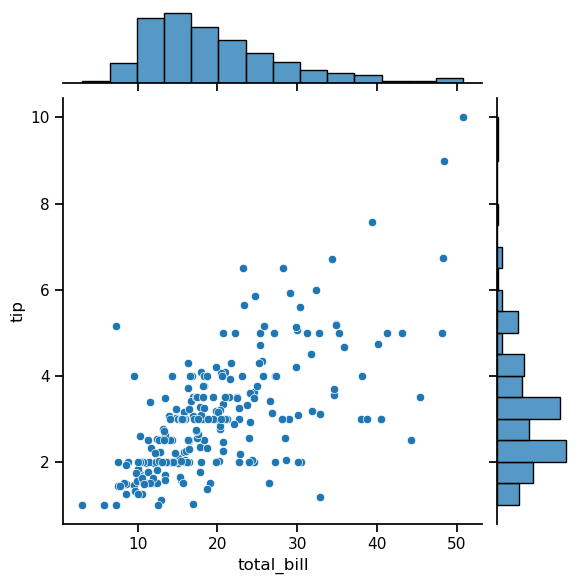

In [14]:
# Jointplot (default: scatter)

sns.jointplot(data=tips, x= 'total_bill' , y= 'tip')


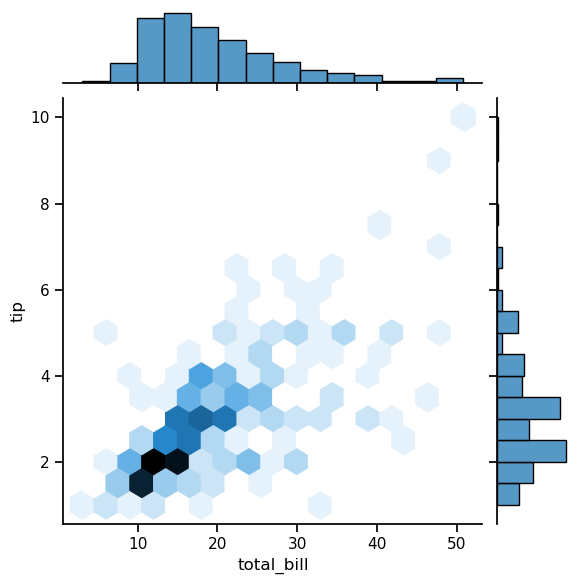

In [15]:
# jointplot hex (hue not supported)

sns.jointplot(x= 'total_bill' , y= 'tip', data=tips, kind = 'hex')


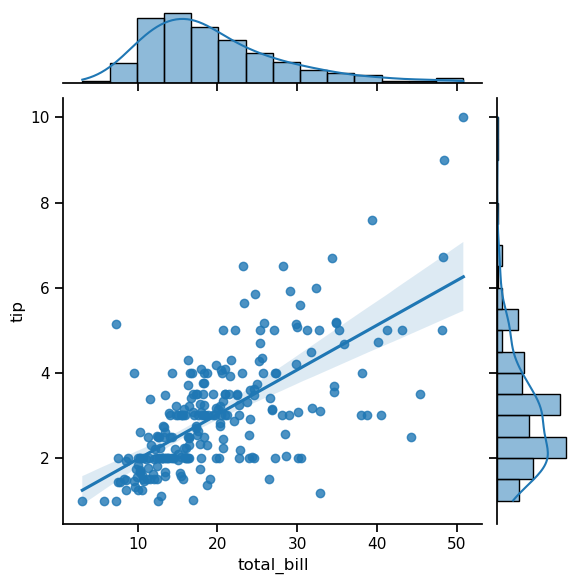

In [16]:
# jointplot reg (hue not supported)

sns.jointplot(x= 'total_bill' , y= 'tip', data=tips, kind = 'reg')


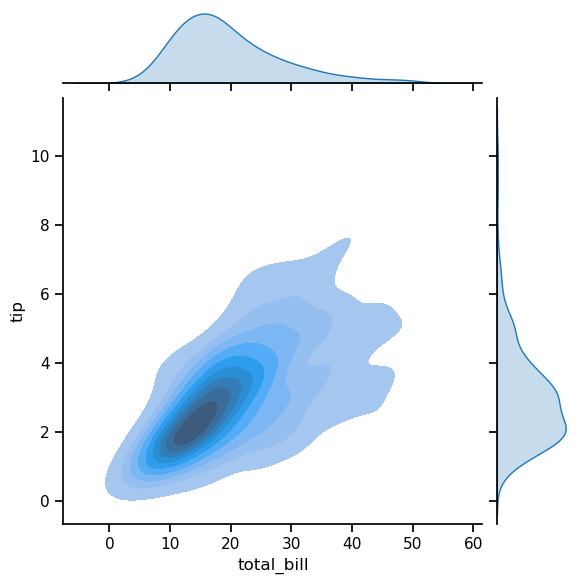

In [17]:
# jointplot kde

sns.jointplot(x= 'total_bill' , y= 'tip', data=tips, kind = 'kde', fill=True) # fill=True


## Pairplot

`.pairplot()` will plot pairwise relationships for all numerical columns of an entire dataframe. It supports a color hue argument for categorical columns.

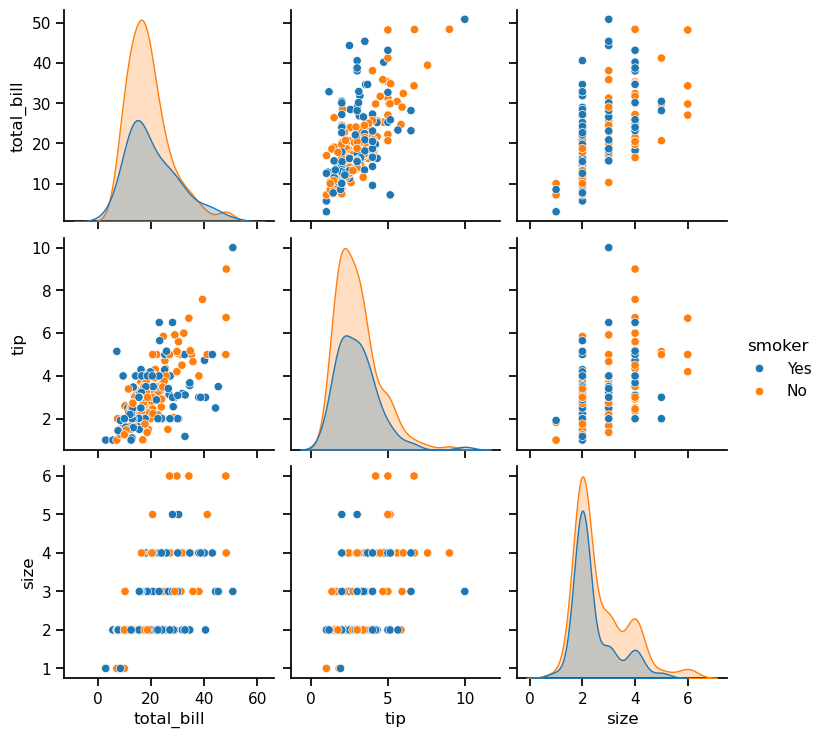

In [18]:
# pairplot 

sns.pairplot(tips, hue='smoker')

There are also options to customize your own grids using **Pairgrid, Facetgrid and Jointgrid.**

## Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* **`barplot`** - most used
* **`countplot`** - most used
* **`boxplot`** - most used
* `violinplot`
* `stripplot`
* `swarmplot`


Let's go through examples of each!

### Countplot vs. Barplot

These two plots are similar in that they both visualize data grouped by a categorical feature. However, they differ in how the values are calculated: 
- **`countplot`** counts the number of occurrences in each category, which is why it only requires the x (or y) value — no numeric column is needed.
- **`barplot`** aggregates the categorical data based off some function, by default the mean. The estimator in the barplot can be changes from mean to i.e. standard deviation using **estimator = np.std**

<Axes: xlabel='count', ylabel='time'>

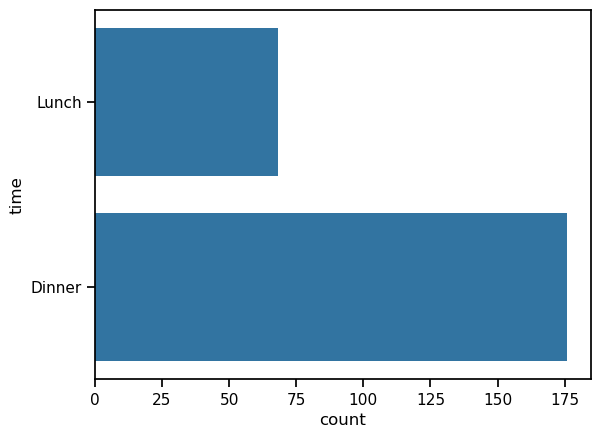

In [19]:
# countplot
sns.countplot(data=tips, y='time')

<Axes: xlabel='time', ylabel='total_bill'>

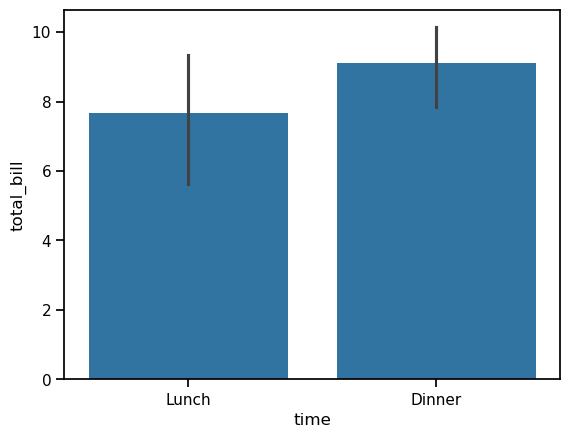

In [20]:
# barplot (default is set to mean)

# sns.barplot(data=tips, x='time', y='total_bill')
# sns.barplot(data=tips, x='time', y='total_bill', errorbar = ('ci',False))    #this will remove the errorbar
sns.barplot(data=tips, x='time', y='total_bill', estimator = np.std)



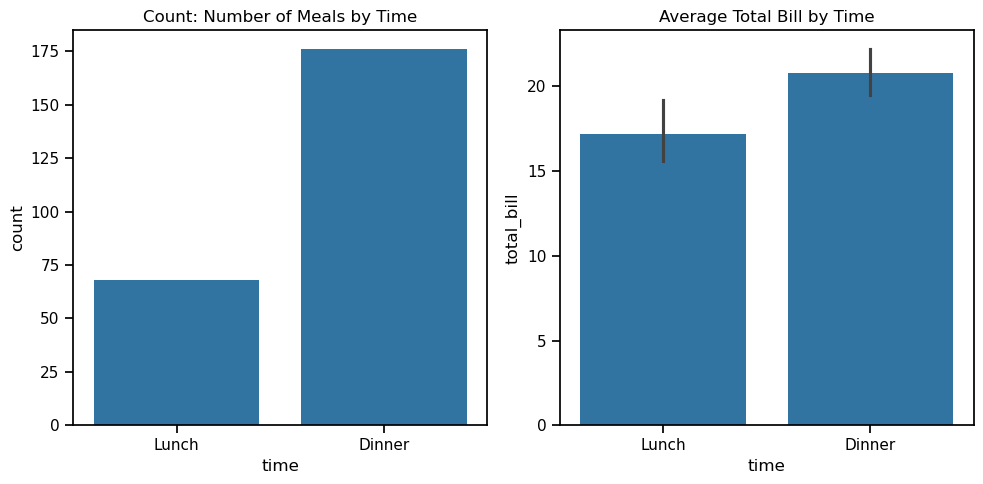

In [21]:
# basic barplot and basic countplot side-by-side

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=tips, x='time', ax=ax[0])
sns.barplot(data=tips, x='time', y='total_bill', ax=ax[1])

ax[0].set_title("Count: Number of Meals by Time")
ax[1].set_title("Average Total Bill by Time")

plt.tight_layout()


### Boxplot and Violinplot

`.boxplots()` and `.violinplot()` show how data is distributed across categories. A boxplot highlights the quartiles and overall spread of the data, while marking outliers. It's great for comparing distributions between different groups.

<Axes: xlabel='day', ylabel='total_bill'>

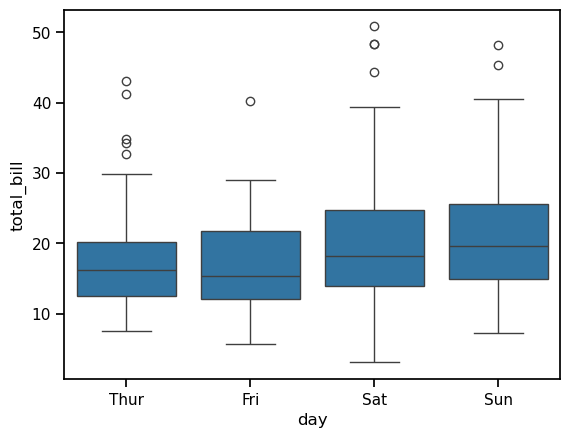

In [22]:
# create boxplot

sns.boxplot(x= 'day', y= 'total_bill', data = tips)

In [23]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='day', ylabel='total_bill'>

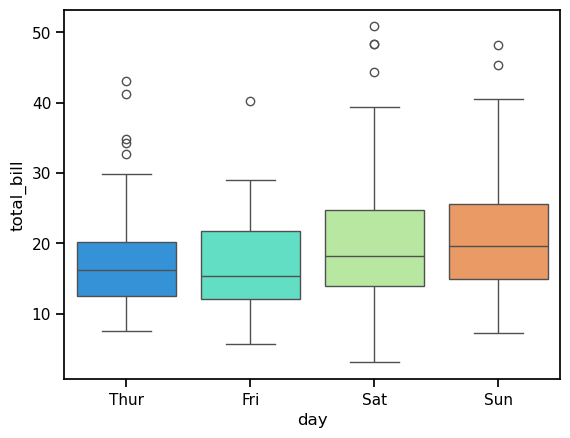

In [24]:
# boxplot with colorcoded days 

#custom_palette = ["blue", "green", "red", "lightgrey"]
#sns.boxplot(x="day", y="total_bill", data=tips, hue = "day", palette = custom_palette)

sns.boxplot(x="day", y="total_bill", data=tips, hue = "day", palette = "rainbow")

<Axes: xlabel='day', ylabel='tip'>

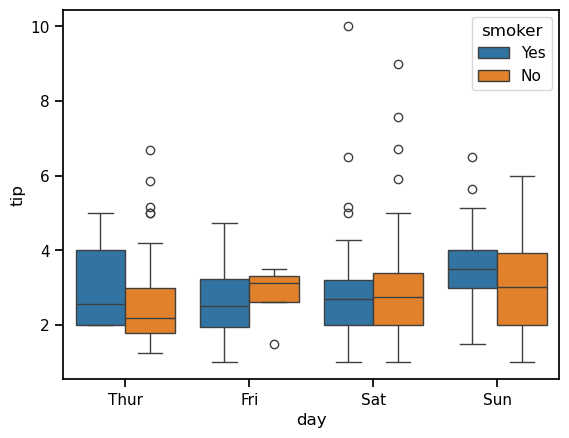

In [25]:
# boxplots comparing smokers and non-mokers per day
# sns.boxplot(x="day", y="total_bill", data=tips, hue = "day", palette = "rainbow")
sns.boxplot(x= 'day', y= 'tip', data = tips, hue= 'smoker')

### Violinplot
A violin plot shows the distribution of numeric data across categories, like a box plot, but also includes a smooth curve to reveal the data's shape.

<Axes: xlabel='day', ylabel='total_bill'>

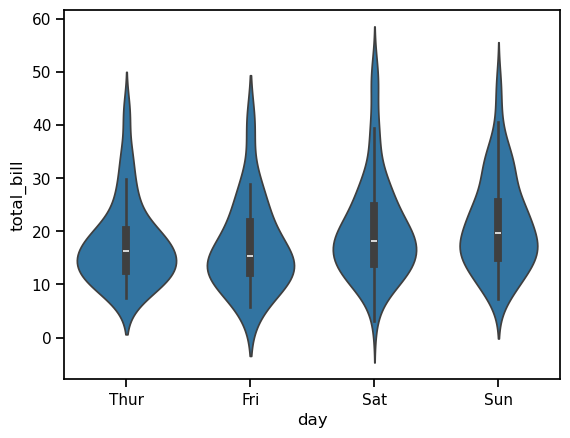

In [26]:
# basic violinplot 

sns.violinplot(x= 'day', y= 'total_bill', data = tips)

<Axes: xlabel='day', ylabel='total_bill'>

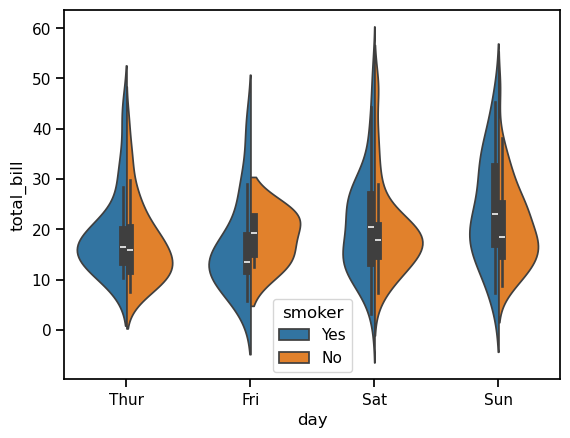

In [27]:
# split violinplot

sns.violinplot(x= 'day', y= 'total_bill', data = tips, hue = 'smoker', split = True)

Below is a more polished version using plt.figure and below that the same using plt.subplots 

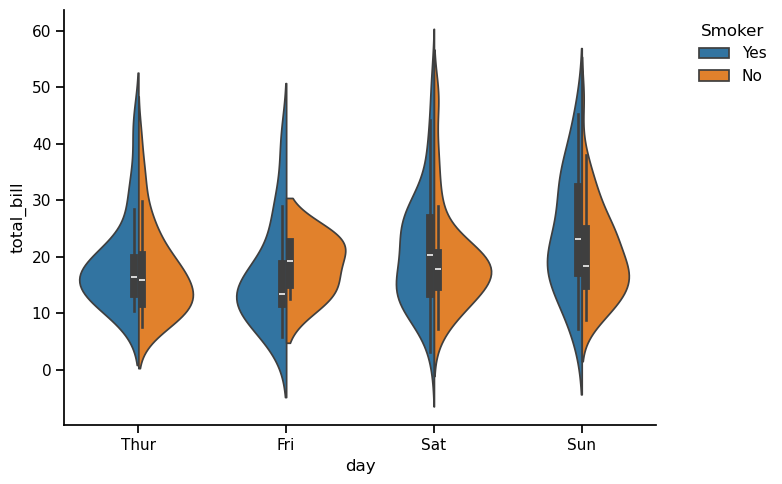

In [28]:
# Create the plot
plt.figure(figsize=(8, 5))
ax = sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker', split=True)

# Clean up the spines
sns.despine()

# Move and style legend (no box)
ax.legend(
    title="Smoker",
    bbox_to_anchor=(1.05, 1),   # move outside of plot to the top
    loc='upper left',   # defines position relative to my anchor-point
    frameon=False   # <-- removes the box
)

plt.tight_layout()
plt.show()



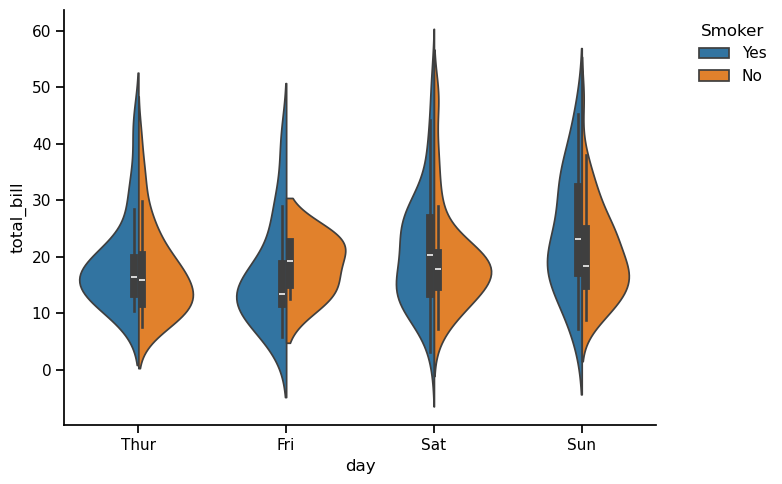

In [29]:
# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker', split=True, ax=ax)

sns.despine()
ax.legend(
    title="Smoker",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False  
)

plt.tight_layout()
plt.show()

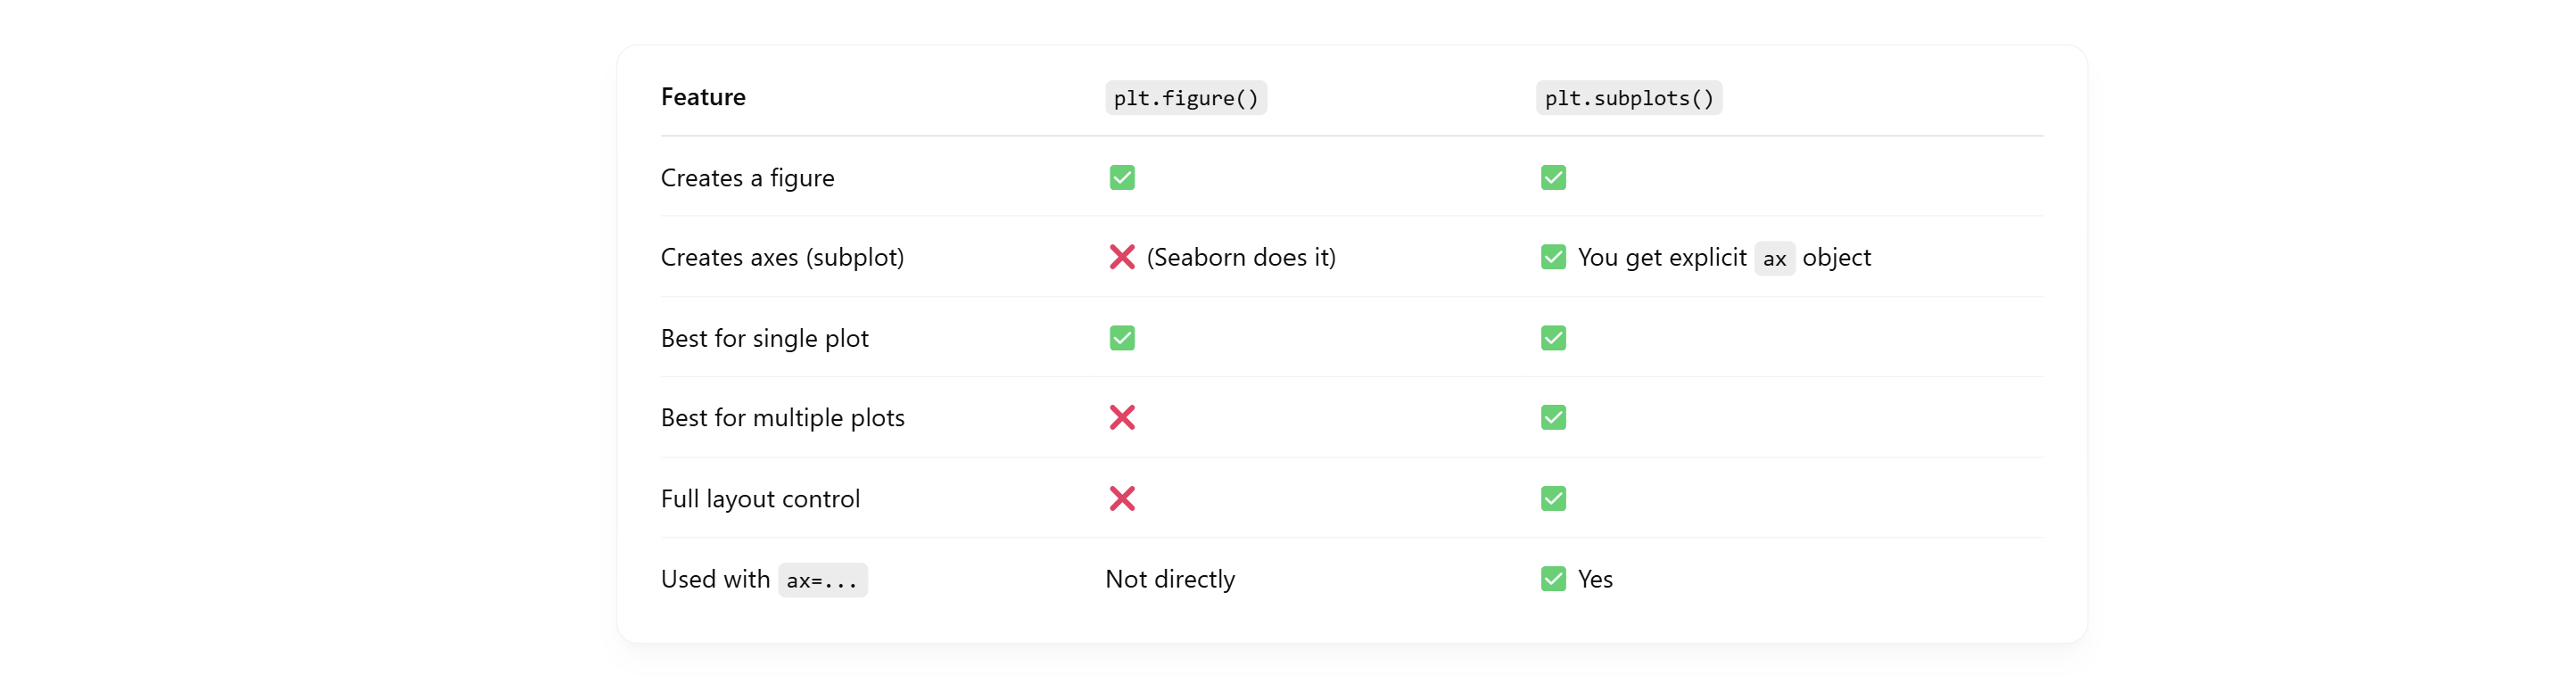

### Stripplot and Swarmplot
`.stripplot()` the strip plot is going to draw a scatterplot where one variable is categorical. 

`.swarmplot()` does the same but avoids overlap, making the distribution easier to see—though it's slower with large datasets.

<Axes: xlabel='day', ylabel='total_bill'>

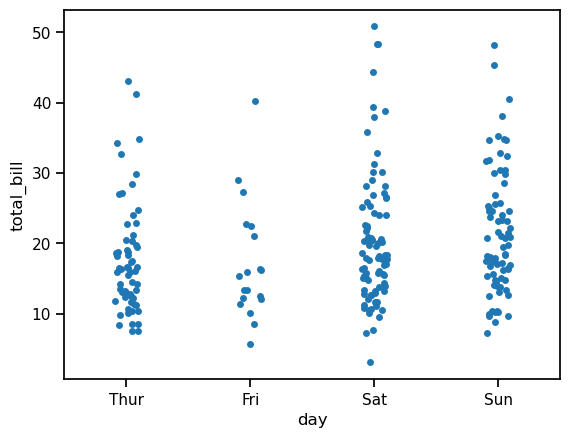

In [30]:
# create  (jitter is set to True by default)

# sns.stripplot(x= 'day', y= 'total_bill', data = tips)
sns.stripplot(x= 'day', y= 'total_bill', data = tips, jitter = True)

<Axes: xlabel='day', ylabel='total_bill'>

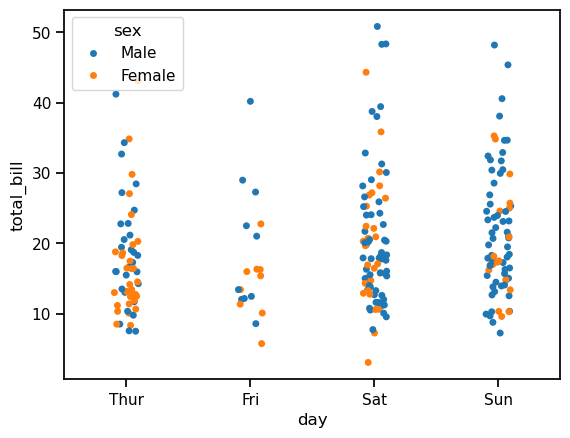

In [31]:
# stripplot with hue 

sns.stripplot(x = 'day', y = 'total_bill', data = tips, hue= 'sex')

<Axes: xlabel='day', ylabel='total_bill'>

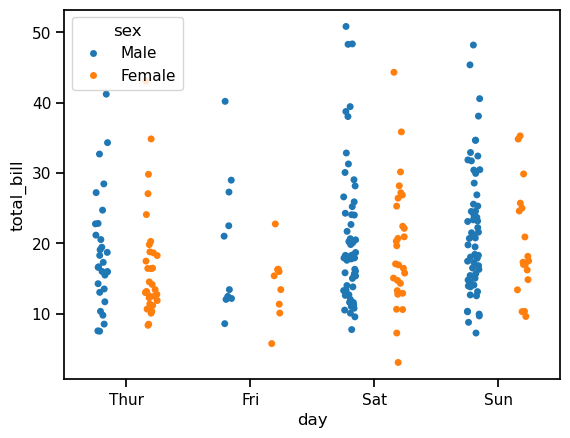

In [32]:
# stripplot with dodge = True

sns.stripplot(x= 'day', y= 'total_bill', data = tips, hue= 'sex', dodge=True)

### Combining Categorical Plots

<Axes: xlabel='day', ylabel='total_bill'>

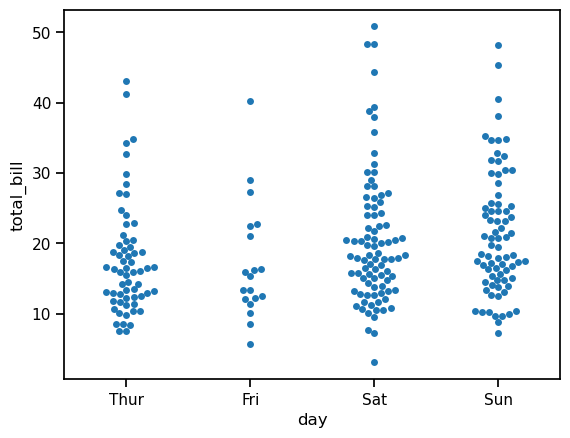

In [33]:
# swarm plot

sns.swarmplot(x= 'day', y= 'total_bill', data = tips)

<Axes: xlabel='day', ylabel='total_bill'>

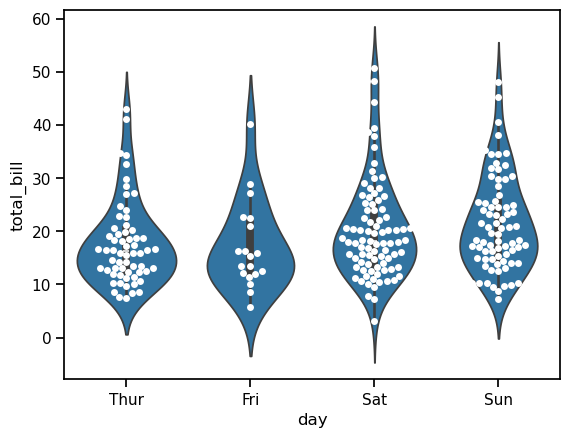

In [34]:
# combination of two plots

sns.violinplot(x= 'day', y= 'total_bill', data = tips)
sns.swarmplot(x= 'day', y= 'total_bill', data = tips, color= 'white')


### Catplot

``catplot`` is like a flexible, intelligent plot generator for categorical data — perfect for fast EDA and multi-panel visualizations. It can take in a **kind** parameter to adjust the plot type to:

- `strip`	Scatter plot (jittered dots)
- `swarm`	Non-overlapping dots
- `box`	    Box-and-whisker plot
- `violin`	Distribution with KDE
- `bar`	    Mean with confidence intervals
- `point`	Line plot for categorical data
- `count`	Count of observations per category

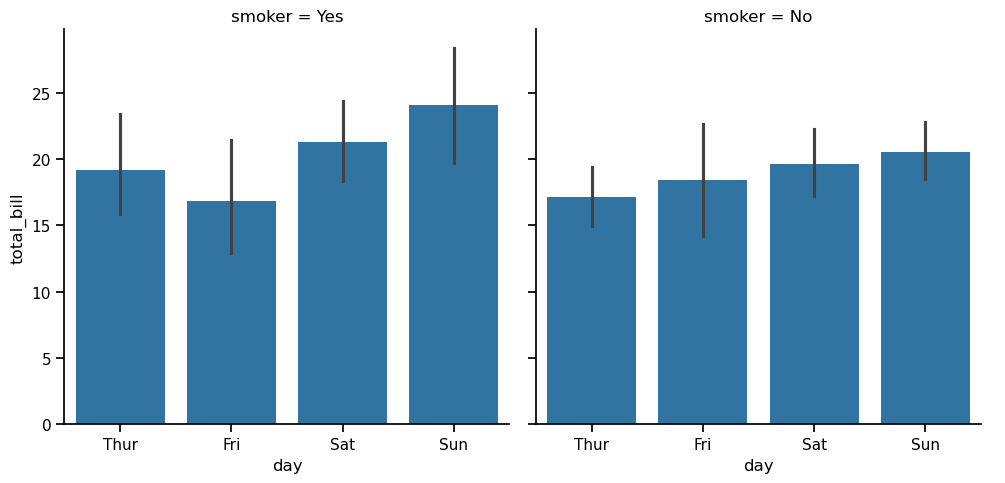

In [35]:
# using col to create a 1d grid plot
sns.catplot(data=tips, x="day", y="total_bill", kind="bar", col="smoker", sharey=True)

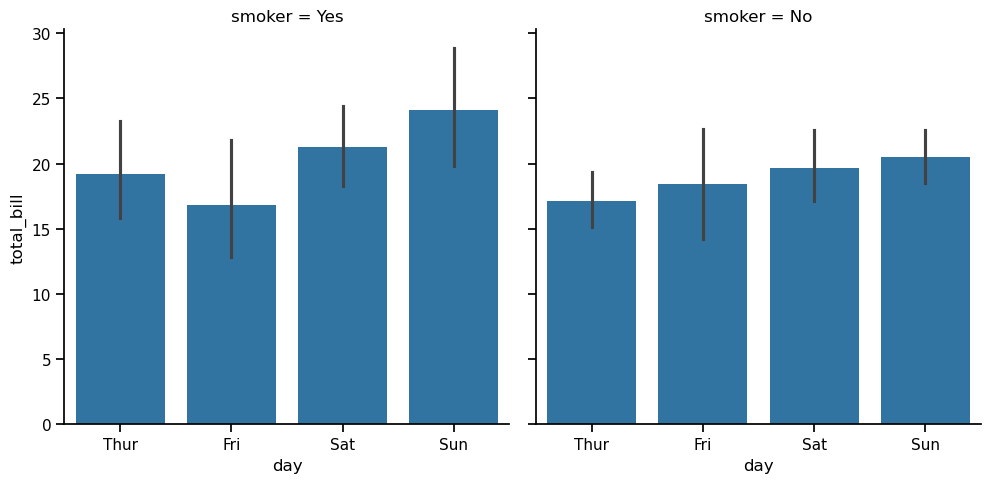

In [36]:
sns.catplot(data=tips, x="day", y="total_bill", kind="bar", col="smoker")

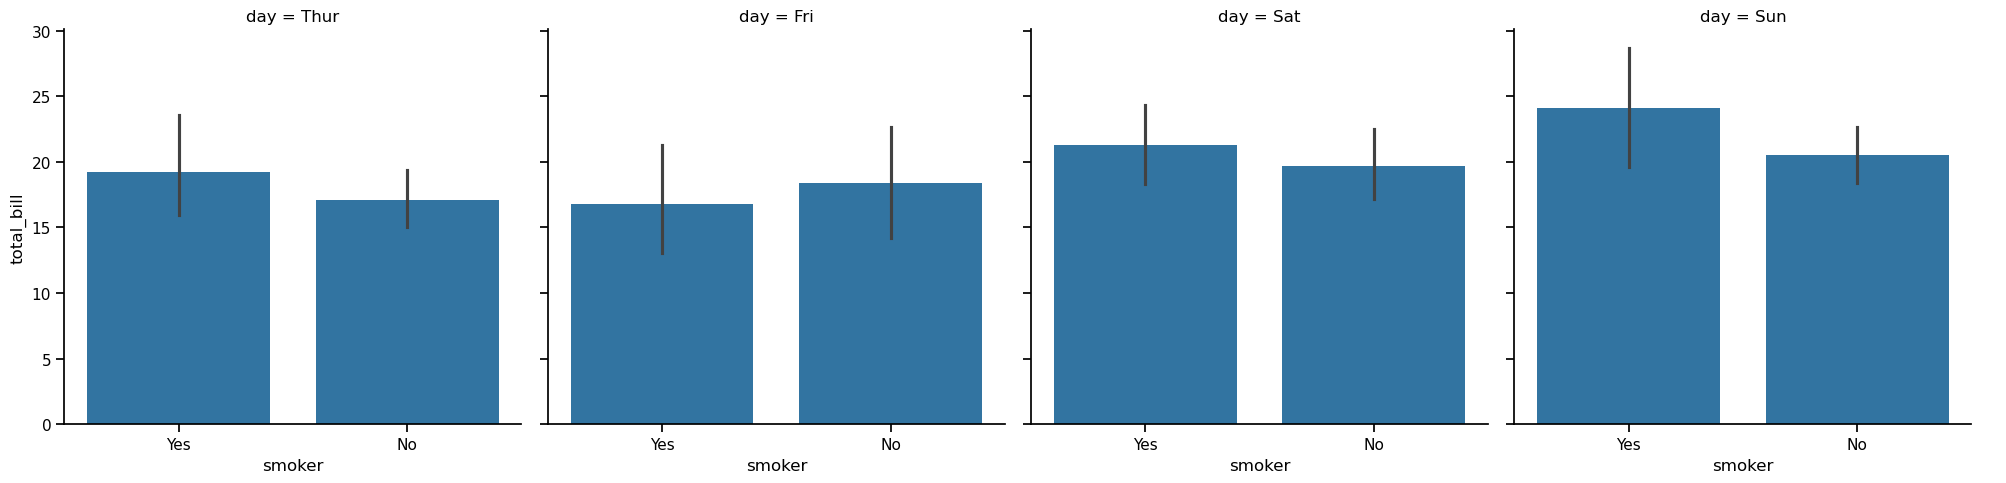

In [37]:
sns.catplot(data=tips, x="smoker", y="total_bill", kind="bar", col="day")
#sns.catplot(data=tips, x="smoker", y="tip", kind="bar", col="day")

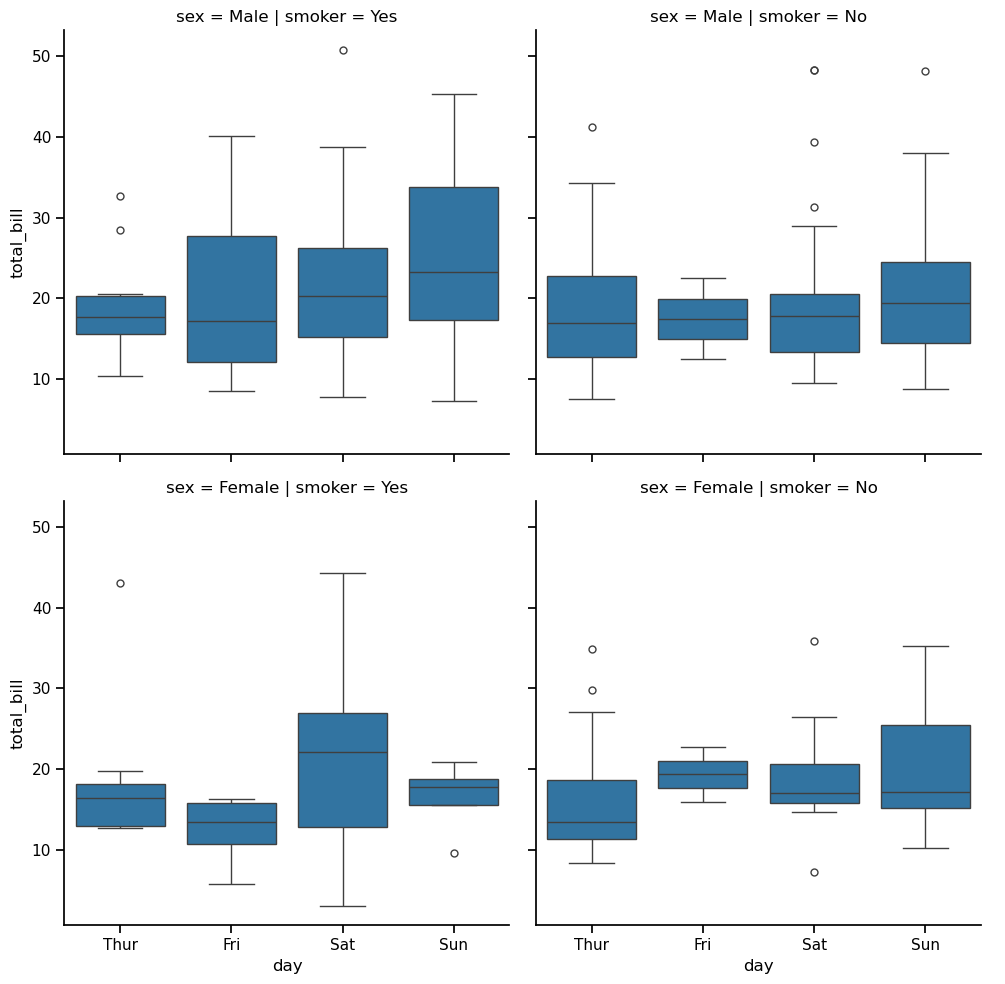

In [38]:
# use col and row to create 2d grid
sns.catplot(data=tips,x="day",y="total_bill", kind="box", row="sex", col="smoker")


# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **`lmplot`()** function for now.

- **`lmplot`** draws scatter plots with a regression line (a best fit line)
- It also makes it easy to split the plot into subplots using col= or row=
- Color different groups using hue=


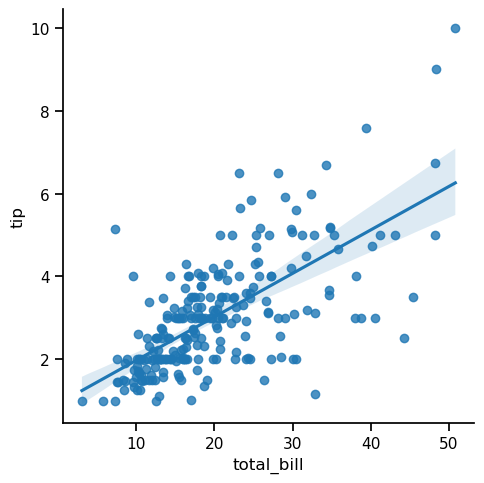

In [39]:
# create lmplot

sns.lmplot(x= 'total_bill', y= 'tip', data = tips)

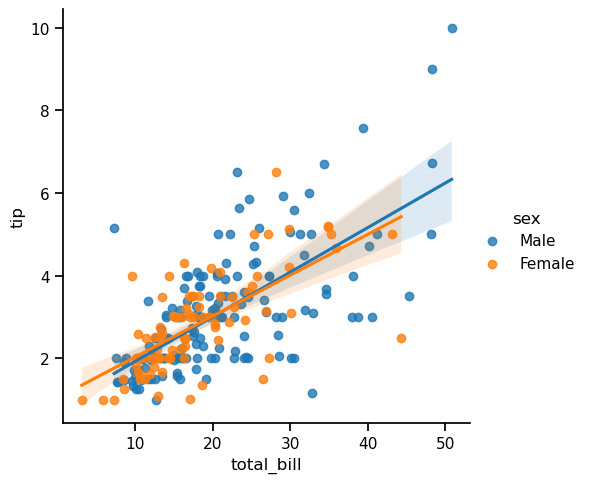

In [40]:
sns.lmplot(x= 'total_bill', y= 'tip', data = tips, hue= 'sex')

### Working with Markers

`.lmplot()` internally uses regplot (which draws the scatter points and regression line).Regplot passes some settings to matplotlib.pyplot.scatter(), which is the function that draws the individual dots. So, if you want to customize marker appearance, like size or shape, you need to use **scatter_kws**. Check [here](http://matplotlib.org/api/markers_api.html) for more details on marker types.


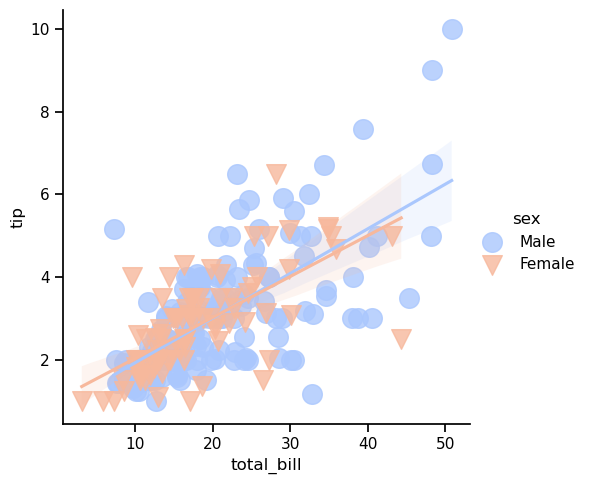

In [41]:
# Create lpmplot with 'o' and 'v' markers and scatter_kws

sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',markers=['o','v'], scatter_kws={'s':200})

### Grids

certain plot types in Seaborn can be used to easily create grids using (col=, row=, or hue=). The plot types that can do this are: 
- `catplot()`	Categorical plots (bar, box, violin…)
- `lmplot()`	Regression + scatter
- `relplot()`	Line and scatter plots
- `displot()`	Histograms, KDEs

To create the grid they are using Seaborns **FacetGrid, PairGrid, JointGrid** in the background. 

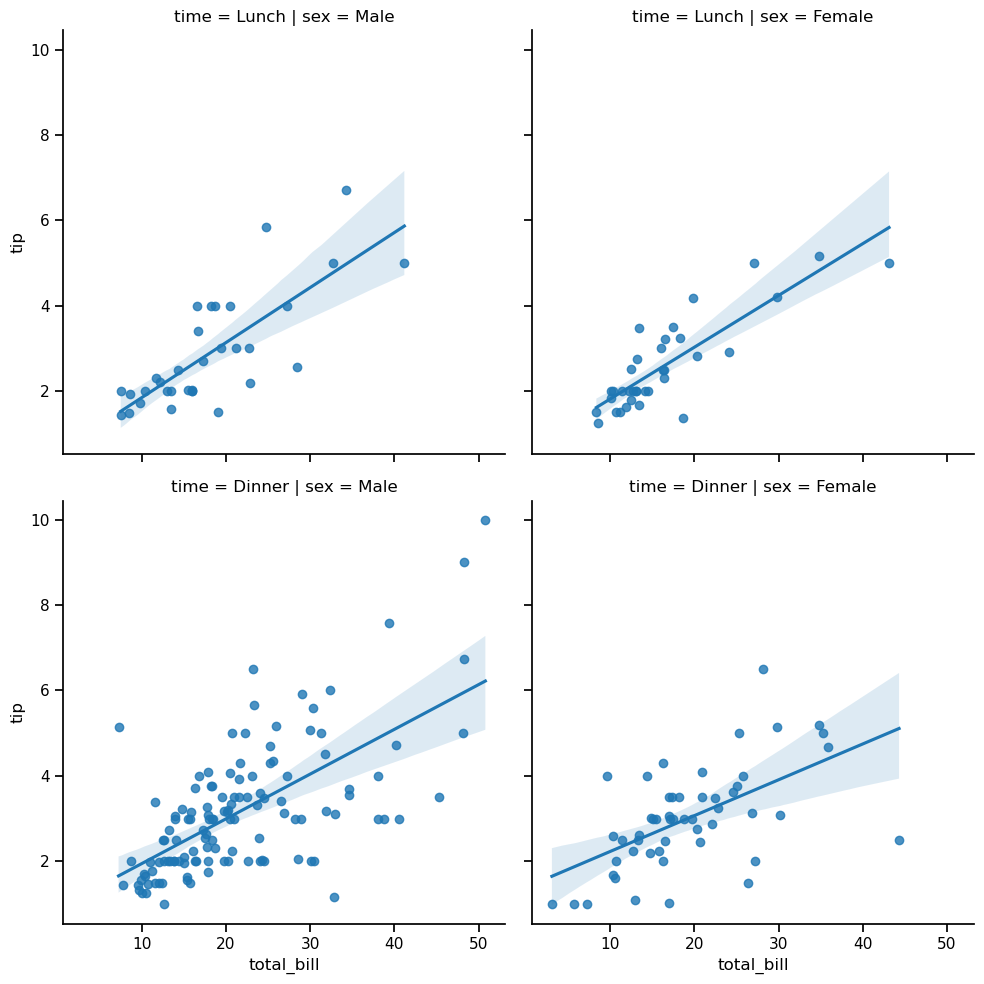

In [42]:
sns.lmplot(x= 'total_bill', y= 'tip', data = tips, col = 'sex', row = 'time')

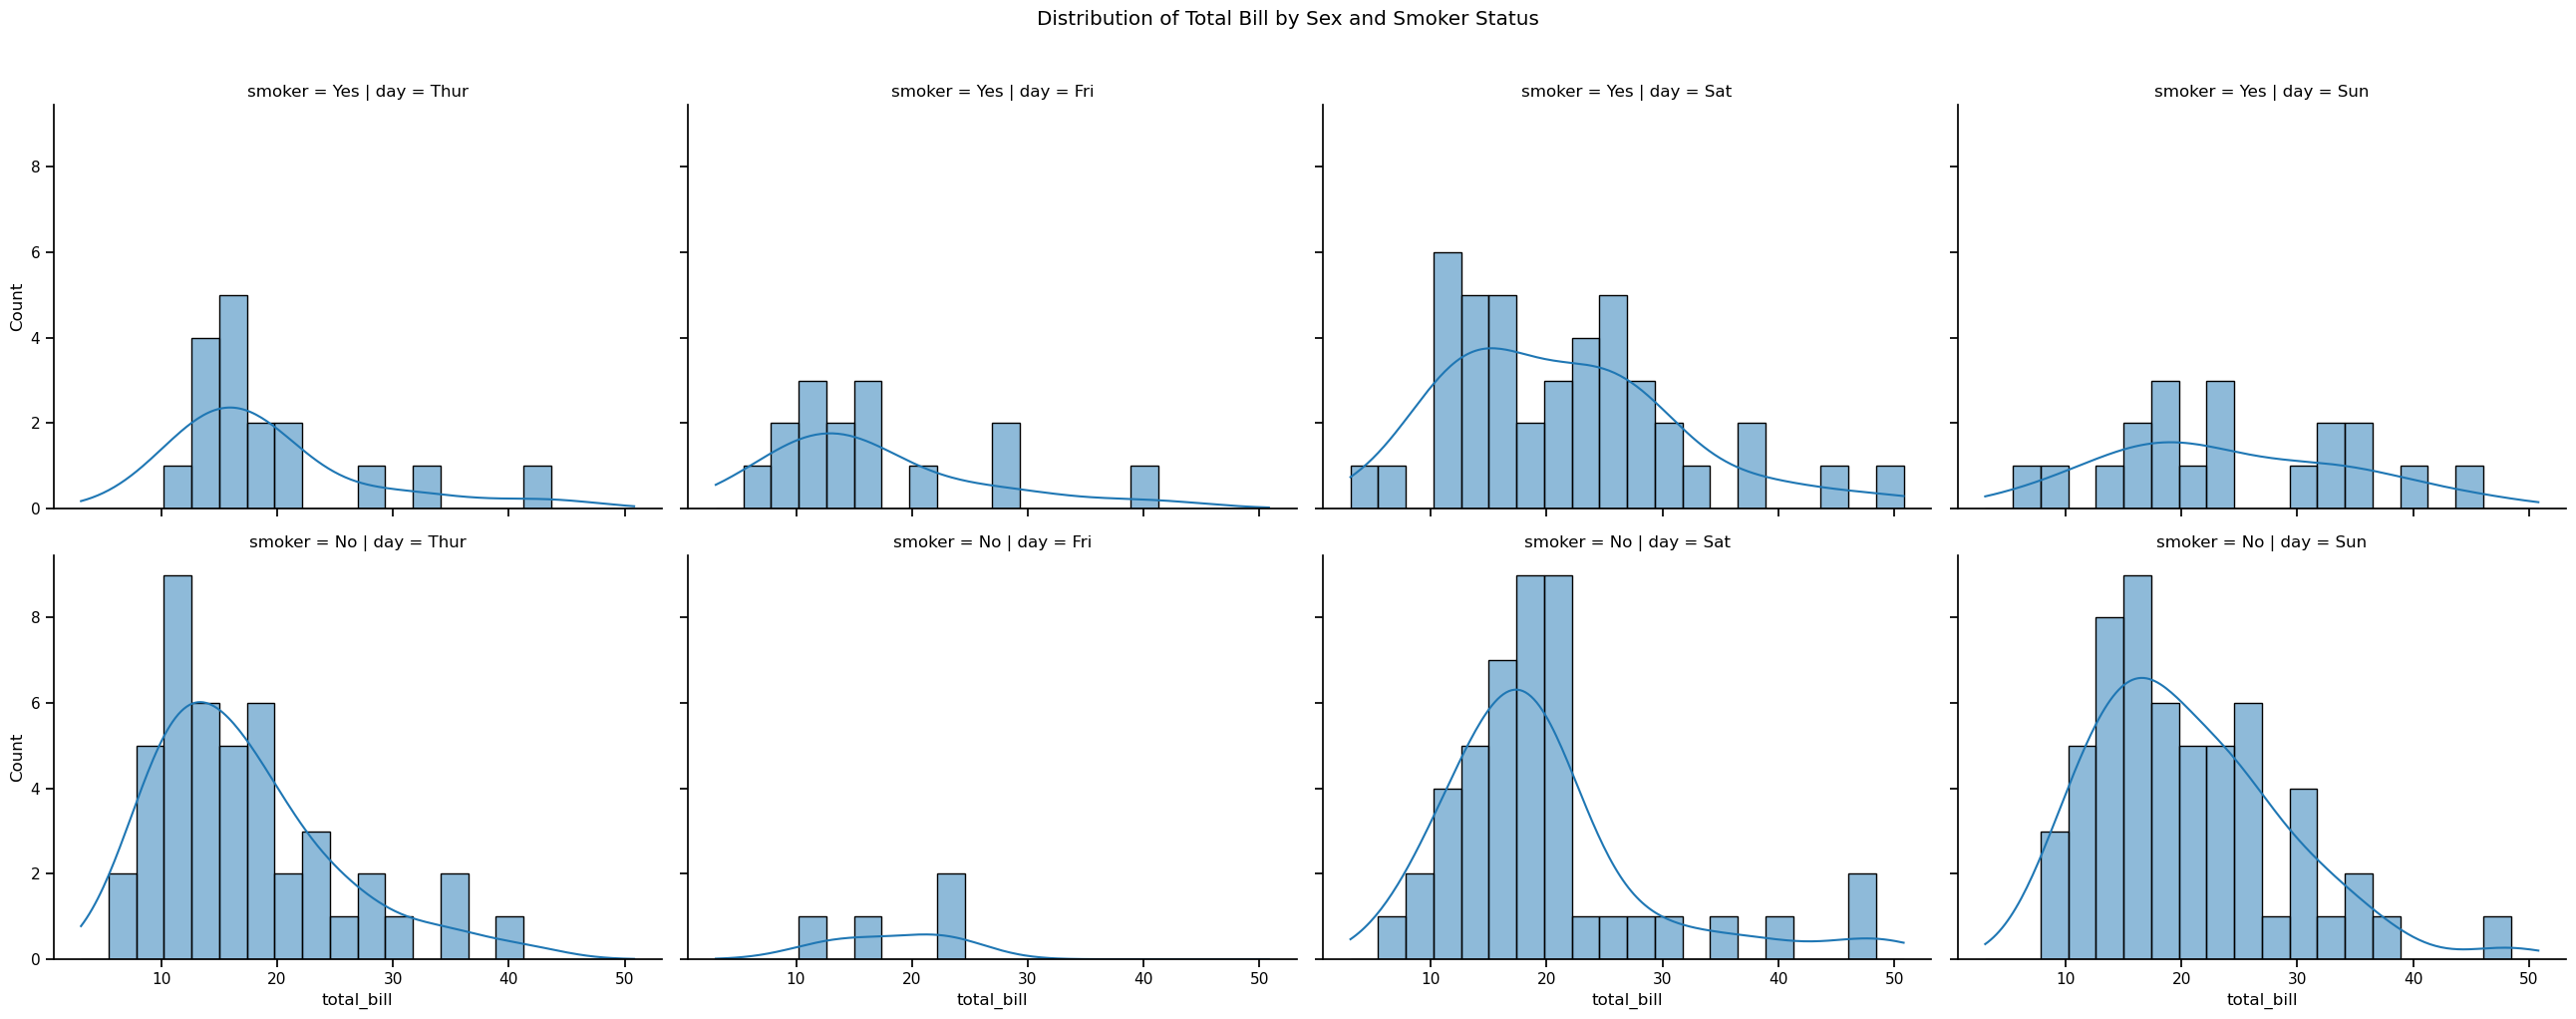

In [43]:
# grid of histograms by day (columns) and smoker status (rows)
sns.displot(
    data=tips,
    x="total_bill",
    col="day",          # columns: Male / Female
    row="smoker",       # rows: Yes / No
    bins=20,
    height=5,
    aspect=1.3,
    kde=True            # optionally overlay KDE
)

plt.suptitle("Distribution of Total Bill by Sex and Smoker Status", y=1.02)
plt.tight_layout()
plt.show()



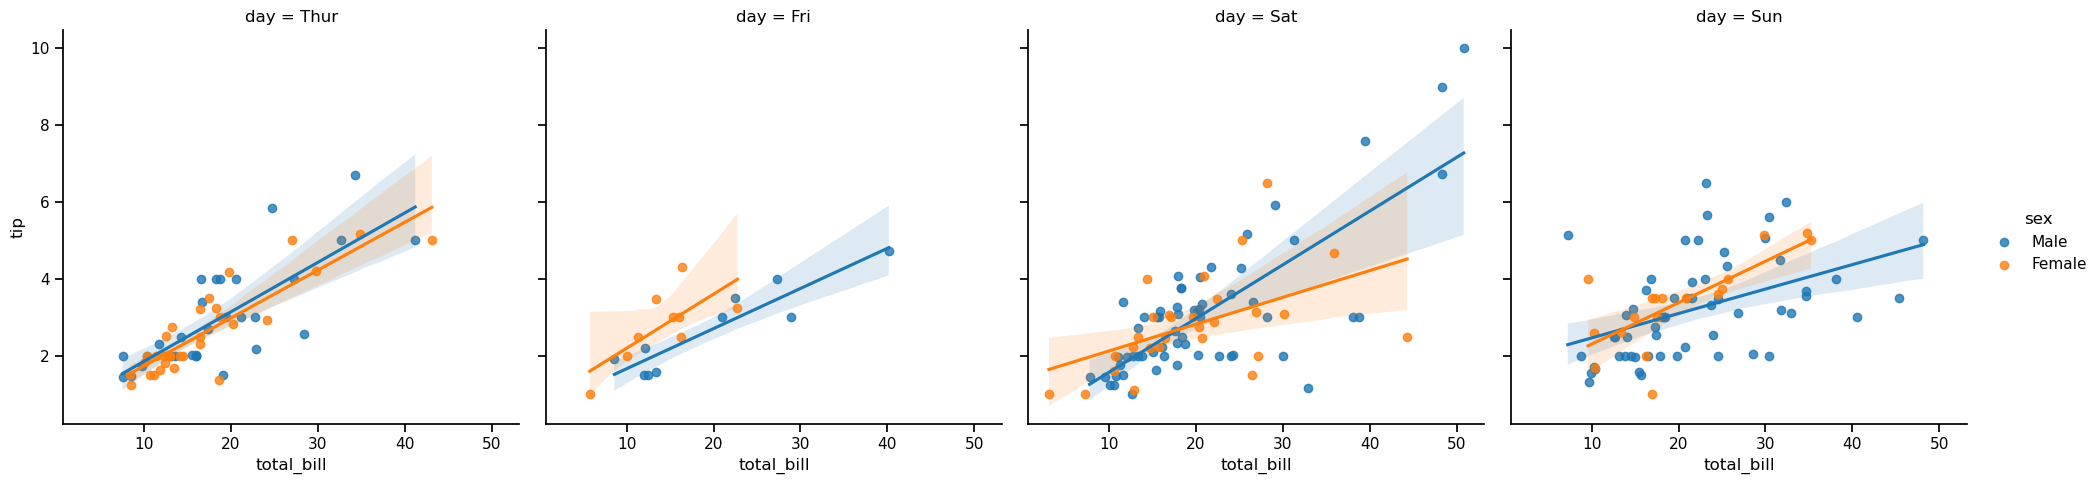

In [44]:
sns.lmplot(x= 'total_bill', y= 'tip', data = tips, col = 'day', hue= 'sex')


## Height and Aspect

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:
- `height=4` = plot is 4 inches tall
- `aspect=1.5` = plot is 1.5 × as wide as tall

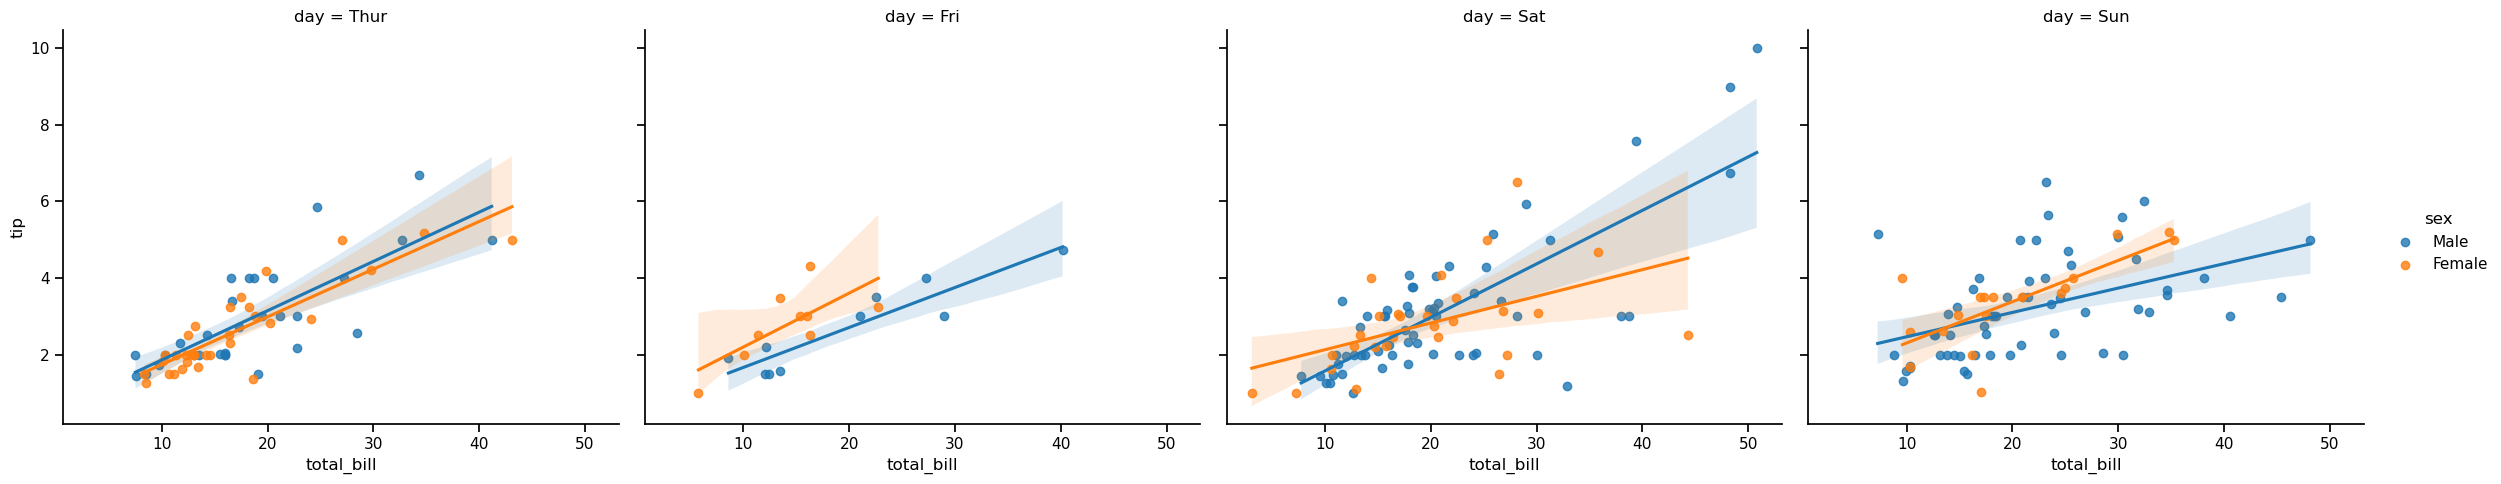

In [45]:
sns.lmplot(x= 'total_bill', y= 'tip', data = tips, col = 'day', hue= 'sex', height= 5, aspect= 1.2)

## Heatmap

In order for a `heatmap` to work properly, your data should already be in a matrix form, the sns.`heatmap` function basically just colors it in for you. For example:

In [46]:
# Compute the correlation matrix (numerical columns only)
corr = tips.corr(numeric_only=True)
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


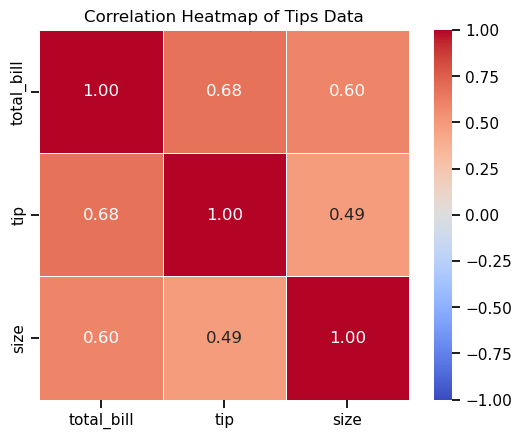

In [47]:
# Compute the correlation matrix (numerical columns only)
corr = tips.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(data=corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square = True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Tips Data")
#plt.tight_layout()
plt.show()


# Style and Color

## Styles

You can set particular styles:

<Axes: xlabel='sex', ylabel='count'>

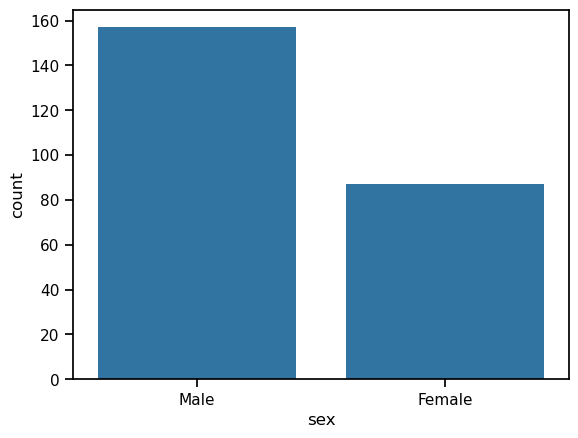

In [48]:
# This is how the default style looks like

sns.countplot(data= tips, x = 'sex')

<Axes: xlabel='smoker', ylabel='count'>

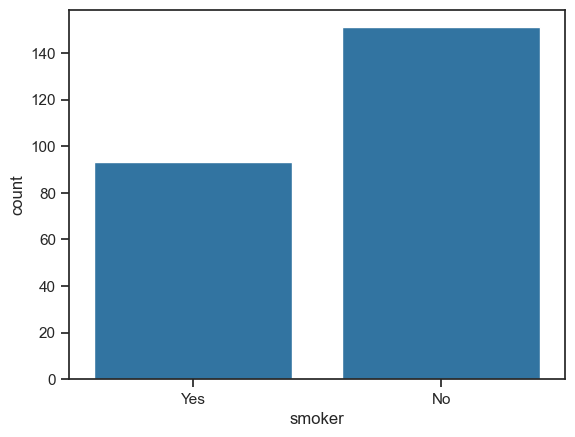

In [49]:
# seaborne has a set style argument which allows to set the style for the rest of the plots.

# sns.set_style('darkgrid')
# sns.set_style('whitegrid')
# sns.set_style('white')
sns.set_style('ticks')

sns.countplot(data= tips, x = 'smoker')


### Spine Removal
By default, matplotlib adds four spines to every chart, which can often introduce unnecessary clutter. Removing the top and right spines is almost always part of refining a matplotlib/seaborn chart, helping to focus attention on the data itself.

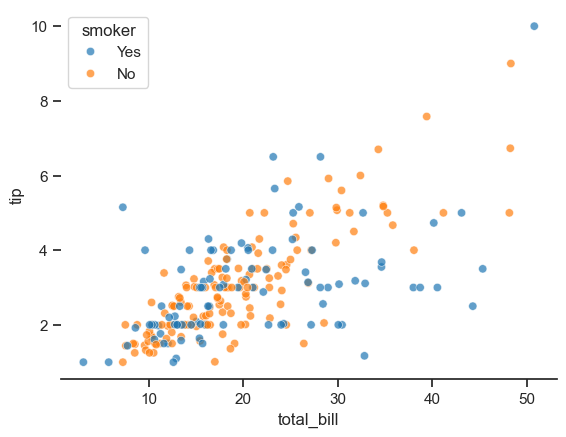

In [50]:
fig, ax = plt.subplots()

sns.scatterplot(data= tips, x = 'total_bill', y='tip', hue='smoker', alpha=0.7)

#sns.despine() # this removes the top and right spine by default
sns.despine(left = True, bottom = False) # this would remove all spines

plt.show()


### Tick Removal
Ticks often add little value to a visualization and can distract from the data. Eliminating them is a quick way to create a cleaner, more minimalist axes. Remove the x and y ticks by using `ax.tick_params()` and setting `length=0`

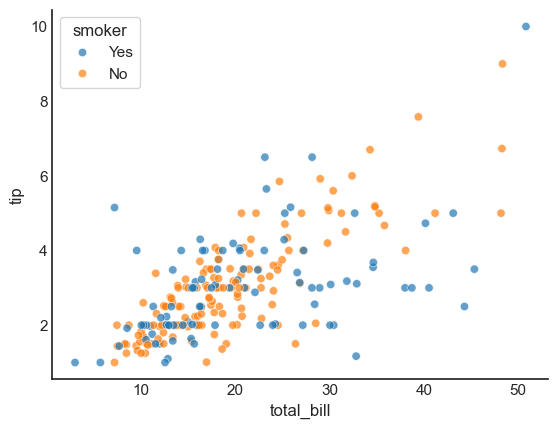

In [51]:
fig, ax = plt.subplots()

sns.scatterplot(data= tips, x = 'total_bill', y='tip', hue='smoker', alpha=0.7, ax=ax)

sns.despine() 
ax.tick_params(length=0) #this removes the ticks

plt.show()

### Custom Tick Labels

By default, tick labels are small and black, which can hinder readability. Increasing their size and changing their color improves chart legibility and enhances the overall visual appeal.

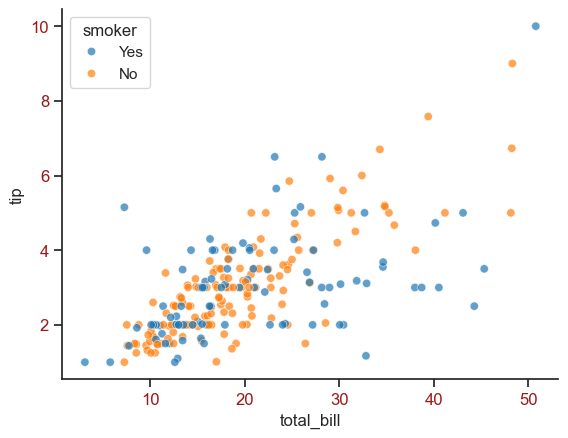

In [52]:
fig, ax = plt.subplots()

sns.scatterplot(data= tips, x = 'total_bill', y='tip', hue='smoker', alpha=0.7, ax=ax)

sns.despine() 
ax.tick_params(
  labelsize=12,
  labelcolor="#9f1818",
) #this adjusts color and size of ticks

plt.show()

### Background Colour
Matplotlib/seaborn charts default to a white background. If you ever wish to change the background you can do it s described below. Apropriate background colors should be subtle, allowing readers to focus on the data. The chosen colors here are for demonstration purposes, rather than being the final choice.
- Set the figure background color to `"#efd9b9"` using `fig.set_facecolor()`
- Set the axes background color to `"#d8d8d8"` using `ax.set_facecolor()`

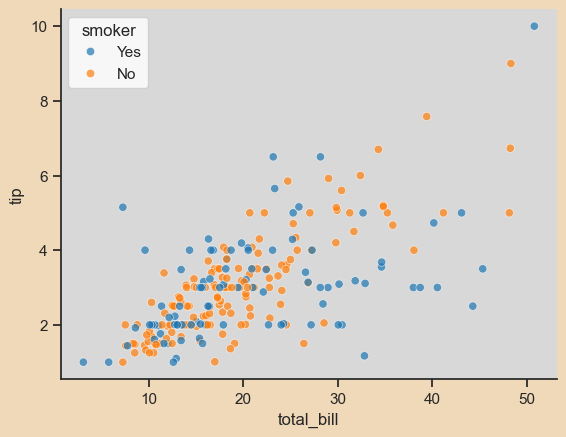

In [53]:
fig, ax = plt.subplots()

sns.scatterplot(data= tips, x = 'total_bill', y='tip', hue='smoker', alpha=0.7)

sns.despine()
fig.set_facecolor("#efd9b9") # this changes the figure colour
ax.set_facecolor("#d8d8d8") # this changes the axes colour

plt.show()

### Legend or not?
Legends often force viewers to switch back and forth between the legend and the data, which can disrupt the experience.
If your chart doesn't explicitly require a legend, it's best to omit it! But please **never remove a legend if it sacrifices understanding**!

### Set Limits
Because most of our data points fall within a smaller range than the default, zooming in on that specific range can reveal more detail. By adjusting the axis limits, we focus on where the data actually is, minimizing empty space and enhancing clarity.
- Set the x-axis limits using `set_xlim()`
- Set the y-axis limits `set_ylim()`

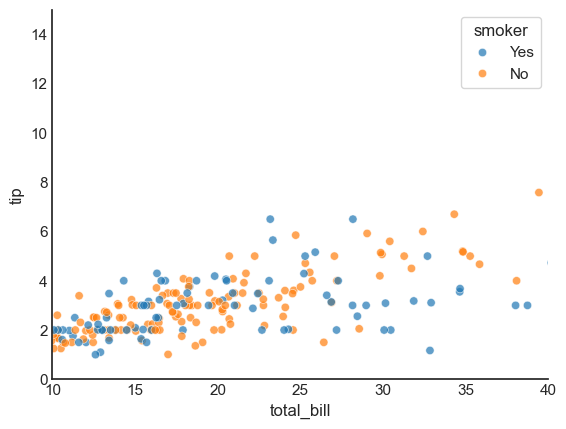

In [54]:
fig, ax = plt.subplots()

sns.scatterplot(data= tips, x = 'total_bill', y='tip', hue='smoker', alpha=0.7, ax=ax)

sns.despine() 
ax.tick_params(length=0)
ax.set_xlim(10, 40) # adjust the axes limits here
ax.set_ylim(0, 15) # and here

plt.show()



### Size

You can use matplotlib's ``plt.figure(figsize=(width,height)`` or ``plt.subplots(w,h)`` to change the size of most seaborn plots.
You can also control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect.

<Axes: xlabel='smoker', ylabel='count'>

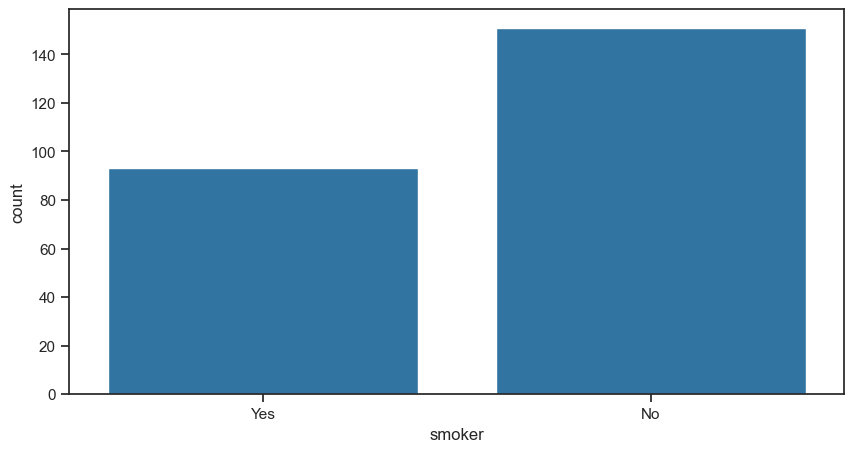

In [55]:
# plt.figure(figsize=(10,5))
# sns.countplot(data= tips, x = 'smoker')

plt.subplots(figsize=(10,5))
sns.countplot(data= tips, x = 'smoker')


### Scale and Context

`set_context()` allows you to override default parameters to better suit your needs. Set this at the beginning of your file together with style.

<Axes: xlabel='smoker', ylabel='count'>

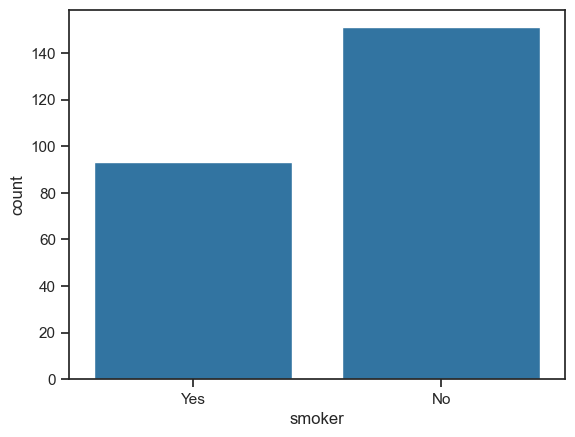

In [56]:
# default: notebook

sns.set_context('notebook')
sns.countplot(data= tips, x = 'smoker')

In [57]:
# sns.set_context("talk")
# sns.countplot(data= tips, x = 'smoker')

In [58]:
# # poster

# # sns.set_context('poster', font_scale=0.5)
# sns.set_context('poster')
# sns.countplot(data= tips, x = 'smoker')


### Palettes & Colours

Check out the documentation page for more info on these topics:

https://matplotlib.org/stable/gallery/color/named_colors.html

https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html